# Lab 01 - IIR Filtering


In [1]:
%pip install numpy scipy pyfdax

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyfdax (from versions: none)
ERROR: No matching distribution found for pyfdax


In [4]:
%pip install numpy scipy pyfda

Note: you may need to restart the kernel to use updated packages.


In this lab, you are going to have a deeper look on the IIR Filter. 

## Reading/Preperation
Before the lab, make sure you revise the theoretical principles of IIR filtering. See lecture script, chapter 5.

## Experiment 1: Quantisation effects
Have a look on chapter `5.2.3 Quantisation effects` from the lecture script

For this experiment, use the provided audio file `ps.wav` with a $1 kHz$ sine noise.

In [5]:
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [6]:
def wavfile_to_float32(data):
    prev_data_bytes = data[0].nbytes

    if data.dtype != np.float32:
        data = data.astype(np.float32)
        data = (data + 2**(prev_data_bytes*8/2 -1)) / 2**(prev_data_bytes*8/2)
    return data

### 1.1 Import the audio file.

In [51]:
# YOUR CODE HERE
in_wav = wavfile.read("ps.wav")
audio = in_wav[1]

### 1.2 Design an IIR filter using the `pyfdax` tool
Design a filter that blocks the noise (Note: `pyfdax` only support Single Section structure filters)

### 1.3 Export the coefficients to an `npz` file
`npz` is a file format to store numpy data.

### 1.4 Load the coefficients from the `npz` file

In [52]:
# YOUR CODE HERE
coeffs = np.load("bandstop.npy")
coeffs_a = coeffs[1,:].astype(float)
coeffs_b = coeffs[0,:].astype(float)

#print(coeffs)
#print(coeffs_a)
#print(coeffs_b)

[  1.          -5.62731288  13.41806918 -17.33901118  12.80369994
  -5.12381682   0.86884692]
[  0.93258021  -5.37202557  13.11272781 -17.34608975  13.11272781
  -5.37202557   0.93258021]


### 1.5 Filter the signal

In [55]:
# YOUR CODE HERE
out_audio = signal.lfilter(coeffs_b, coeffs_a, audio)

### 1.6 Write the output to a wavfile

In [57]:
# YOUR CODE HERE
wavfile.write("out.wav", in_wav[0], out_audio.astype(np.int16))

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def pzmap(G, ax=None, marker_color = None):
    
    if marker_color:
        marker_color = [marker_color, marker_color]
    else:
        marker_color = ["r", "b"]
            
    
    if ax:
        actual_imag_min, actual_imag_max = ax.get_ylim()
        actual_real_min, actual_real_max = ax.get_xlim()
    else:
        _, ax = plt.subplots(figsize=(5, 5))
    
    if ax.lines == []:
        # circle
        theta = np.linspace(-np.pi, np.pi, 201)
        ax.plot(np.sin(theta), np.cos(theta), color = 'k', linewidth=0.5)
        ax.axhline(y=0, color='k', alpha=0.3)
        ax.axvline(x=0, color='k', alpha=0.3) 
        actual_imag_min, actual_imag_max = -1.0, 1.0
        actual_real_min, actual_real_max = -1.0, 1.0
       
    # poles
    ax.plot(np.real(G.poles), np.imag(G.poles), 'X%s' % marker_color[0], label = 'Poles')

    # zeros
    ax.plot(np.real(G.zeros), np.imag(G.zeros), '.%s' % marker_color[1], label = 'Zeros')
    
    def make_one_long(a, b, c):
        a = np.array(a)
        gesamt = np.append(a, b)
        return np.append(gesamt, c)

    imag_min = np.min(make_one_long([actual_imag_min], np.imag(G.poles), np.imag(G.zeros))) * 1.05
    imag_max = np.max(make_one_long([actual_imag_max], np.imag(G.poles), np.imag(G.zeros))) * 1.05
    real_min = np.min(make_one_long([actual_real_min], np.real(G.poles), np.real(G.zeros))) * 1.05
    real_max = np.max(make_one_long([actual_real_max], np.real(G.poles), np.real(G.zeros))) * 1.05
    all_lim = np.max([np.abs(real_min), real_max, np.abs(imag_min), imag_max])
    ax.set_xlim(-all_lim, all_lim)
    ax.set_ylim(-all_lim, all_lim) 
        
    ax.legend(loc=1)
    ax.grid()
    return ax

### 1.7 How does the precision of the coefficients (Numerator, Denominator) influence the IIR filter process? 

Try to visualize a comparisson.

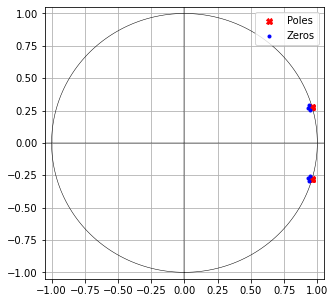

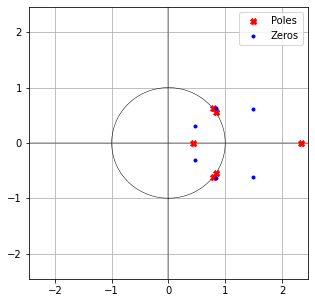

In [90]:
# YOUR CODE HERE

samplerate = 22050
length = audio.shape[0] / samplerate
time = np.linspace(0., length, audio.shape[0])

coeffs = np.load("bandstop.npy")
coeffs_a = coeffs[1,:].astype(float)
coeffs_b = coeffs[0,:].astype(float)

system = signal.TransferFunction(coeffs_a, coeffs_b)
pzmap(system)

coeffs_a = np.round(coeffs_a, 1)
coeffs_b = np.round(coeffs_b, 1)

system = signal.TransferFunction(coeffs_a, coeffs_b)
pzmap(system)


#plt.pzplot(time, audio, label="Left channel")
#plt.plot(time, audio[:, 1], label="Right channel")

plt.show()


YOUR ANSWER HERE

### 1.8 How can those numerical instable calculations be reduced?


Filter N < 2

NED RUNDEN!  <---- ♥♥♥♥♥♥♥